# Day 4  | Basic algorithms, Introduction to Machine Learning 

In the last days of the first week, we will introduce simple algorithms and their meaning and introduce machine learning concept. Algorithms allow you to write a number of instructions and repeat those along a set of data.

### Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to algorithmically compute summary statistics for the data in question. Examples are the sum, product, median, minimum and maximum, quantiles, etc...

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

In [1]:
import numpy as np

x = np.random.random(10)
x.shape


(10,)

In [2]:
x[:,np.newaxis].shape

(10, 1)

In [3]:
for i in x:
    print ("x =", i)

x = 0.05333873522354504
x = 0.6908228412181809
x = 0.07250567558951715
x = 0.627229356584234
x = 0.28692650848583023
x = 0.044415024295900385
x = 0.18399604423685179
x = 0.48766740809005404
x = 0.3448953348127277
x = 0.0729674282603503


In [4]:
sum_x = 0; #defines primero la variable temporalmente
for element in x:    #llamarlo element o lo que sea da igual in x si tiene que ser x porque así llamamos al array antes
    sum_x += element    #o sum_x = sum_x + element, lo otro es más limpio
    
print ("sum =", sum_x)

sum = 2.864764356797191


Alternatively we can use NumPy function:

In [5]:
np.sum(x)

2.864764356797192

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [6]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

82.3 ms ± 5.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
497 µs ± 47.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
x

array([0.05333874, 0.69082284, 0.07250568, 0.62722936, 0.28692651,
       0.04441502, 0.18399604, 0.48766741, 0.34489533, 0.07296743])

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [8]:
np.min(x), np.max(x)

(0.044415024295900385, 0.6908228412181809)

Here we look inside the algorithm for max:

In [9]:
max_value=0.0

for element in x:
    if (element > max_value): max_value = element
    
print(max_value)    

0.6908228412181809


This is an algorithm that finds maximal value in a vector. We can use the same algorithm to find min in a matrix:

In [10]:
x = np.random.uniform(10, size=(3, 3))

In [11]:
x

array([[2.62609088, 1.36216968, 2.99268657],
       [4.03636862, 2.04893385, 6.41737032],
       [6.9901109 , 1.17196536, 5.84848785]])

In [17]:
min_value=1000000.0     #for min you set it to a very large number

for i in range(x.shape[0]):   #i = filas y j = columnas
    for j in range(x.shape[1]):
        if (x[i,j] < min_value): min_value = x[i,j]
            
min_value            

1.1719653598343882

In [12]:
x.shape    #te da la dimensión de la matriz (como ya sabes)

(3, 3)

NumPy comes handy here:

In [23]:
x.min(axis=0)   #está cogiendo el mínimo de CADA columna y te lo da en un array

array([2.62609088, 1.17196536, 2.99268657])

In [18]:
x.min(axis=1)   #está cogiendo el mínimo de CADA fila y te lo da en un array

array([1.36216968, 2.04893385, 1.17196536])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.


The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |



NAN viene muy bien cuando los datos están incompletos y hay datos que son NaN

### Algorithm: Sorting Matrices

Up to this point we have been concerned mainly with tools to access and operate on array data with NumPy.
This section covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had dreams (or, depending on your temperament, nightmares) about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more.
All are means of accomplishing a similar task: sorting the values in a list or array.

For example, a simple *selection sort* repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [24]:
import numpy as np

def vec_sort(x):
    for i in range(len(x)):  #usamos len porque es un vector y no tiene dimensión, no usamos shape
        swap = i + np.argmin(x[i:])   #0 + la posición del mínimo
        (x[i], x[swap]) = (x[swap], x[i]) #aquí cambiamos los elemntos en el array de modo que va cambiando de menos a mas
    return x

In [25]:
x = np.random.random(10)
x


array([0.94387329, 0.49788365, 0.41866679, 0.62729321, 0.77226035,
       0.46136468, 0.31797064, 0.71472466, 0.27476089, 0.54191922])

In [26]:
vec_sort(x)

array([0.27476089, 0.31797064, 0.41866679, 0.46136468, 0.49788365,
       0.54191922, 0.62729321, 0.71472466, 0.77226035, 0.94387329])

As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays.
For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value.
In terms of the "big-O" notation, sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time will go up by about a factor of four.

Even selection sort, though, is much better than other sorting algorithm, the *bogosort*:

In [ ]:
x = np.random.random(10)
x


In [27]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):   #comparamos el ultimo número con el resto del array 1:
        np.random.shuffle(x)
    return x

In [36]:
x[1:]

array([0.31797064, 0.41866679, 0.46136468, 0.49788365, 0.54191922,
       0.62729321, 0.71472466, 0.77226035, 0.94387329])

In [37]:
bogosort(x)

array([0.27476089, 0.31797064, 0.41866679, 0.46136468, 0.49788365,
       0.54191922, 0.62729321, 0.71472466, 0.77226035, 0.94387329])

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [38]:
np.sort(x)

array([0.27476089, 0.31797064, 0.41866679, 0.46136468, 0.49788365,
       0.54191922, 0.62729321, 0.71472466, 0.77226035, 0.94387329])

A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [39]:
x = np.random.random(10)
x



array([0.53988265, 0.68861859, 0.42099302, 0.64040675, 0.95303872,
       0.06289806, 0.67975764, 0.83613326, 0.71730211, 0.95955089])

In [40]:
i = np.argsort(x)
i

array([5, 2, 0, 3, 6, 1, 8, 7, 4, 9])

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

In [47]:
x = np.random.uniform(10, size=(3, 3))

x


array([[1.81870954, 5.42627898, 3.6199285 ],
       [1.53268194, 6.5871001 , 3.74497179],
       [9.08239768, 3.94798653, 2.28686079]])

In [48]:
# sort each row of X
np.sort(x, axis=1)

array([[1.81870954, 3.6199285 , 5.42627898],
       [1.53268194, 3.74497179, 6.5871001 ],
       [2.28686079, 3.94798653, 9.08239768]])

In [49]:
# sort each colume of X
np.sort(x, axis=0)

array([[1.53268194, 3.94798653, 2.28686079],
       [1.81870954, 5.42627898, 3.6199285 ],
       [9.08239768, 6.5871001 , 3.74497179]])

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [59]:
x = np.random.randint(10,size=(1,10))

x


array([[2, 0, 2, 1, 8, 5, 6, 5, 6, 5]])

In [60]:
np.partition(x, 3)

array([[1, 0, 2, 2, 5, 5, 6, 5, 6, 8]])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Te da dos particiones con los 3 primeros siendo los menores pero NO ESTÁN EN ORDEN

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [61]:
x = np.random.uniform(10, size=(3, 3))

x


array([[6.27947937, 2.88288243, 6.29334165],
       [3.93160848, 5.35746246, 3.46195358],
       [6.54684786, 4.20152516, 7.26446372]])

In [64]:
np.partition(x, 2, axis=0) #column

array([[3.93160848, 2.88288243, 3.46195358],
       [6.27947937, 4.20152516, 6.29334165],
       [6.54684786, 5.35746246, 7.26446372]])

### Example: k-Nearest Neighbors

We will use  ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.
We'll start by creating a random set of 10 points on a two-dimensional plane.
Using the standard convention, we'll arrange these in a $10\times 2$ array:

In [65]:
import matplotlib.pyplot as plotter

x = np.random.RandomState(0).rand(10, 2)
x


plotter.scatter(x[:, 0], x[:, 1], s=50);

Now we'll compute the distance between each pair of points.
Recall that the squared-distance between two points is the sum of the squared differences in each dimension:

In [66]:
print(x)





[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]]


In [67]:
# for each pair of points, compute differences in their coordinates
differences = x[:, np.newaxis, :] - x[np.newaxis, :, :]
differences.shape
#newaxis será la tercera dimensión que se genera con las distancias de cada punto a cada punto de la matriz

(10, 10, 2)

Para comprimir la matriz a 10x10 siendo los números y las distancias a cada uno de los otros puntos hacemos lo siguiente:

In [68]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [69]:
dist_sq.diagonal()


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Es 0 porque estamos comparando un punto consigo mismo por lo tanto es justo el punto en el que hemos medido la distancia consigo mismo.


With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [70]:
nearest = np.argsort(dist_sq, axis=1) #colum
print(nearest)

[[0 2 1 3 6 9 5 4 8 7]
 [1 0 5 2 9 6 3 4 8 7]
 [2 0 1 3 6 5 9 8 4 7]
 [3 6 0 2 9 1 8 5 4 7]
 [4 5 1 9 0 2 6 3 7 8]
 [5 1 4 0 9 2 6 3 8 7]
 [6 3 0 9 2 1 5 8 4 7]
 [7 2 1 8 0 5 3 4 6 9]
 [8 3 2 0 6 1 7 9 5 4]
 [9 6 0 3 5 1 2 4 8 7]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

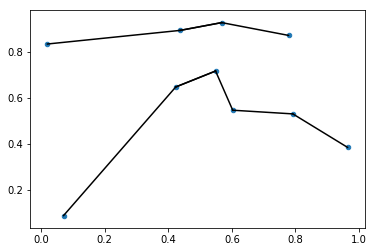

In [71]:
K = 1
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)


plotter.scatter(x[:, 0], x[:, 1], s=20)

# draw lines from each point to its two nearest neighbors
K = 1

for i in range(x.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plotter.plot(*zip(x[j], x[i]), color='black')

## Introduction to Machine Learning

Before we take a look at the details of various machine learning methods, let's start by looking at what machine learning is, and what it isn't.
Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can often be misleading at first brush.
The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of *building models of data*.

Fundamentally, machine learning involves building mathematical models to help understand data.
"Learning" enters the fray when we give these models *tunable parameters* that can be adapted to observed data; in this way the program can be considered to be "learning" from the data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.
I'll leave to the reader the more philosophical digression regarding the extent to which this type of mathematical, model-based "learning" is similar to the "learning" exhibited by the human brain.

Understanding the problem setting in machine learning is essential to using these tools effectively, and so we will start with some broad categorizations of the types of approaches we'll discuss here.

### Categories 

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

*Supervised learning* involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into *classification* tasks and *regression* tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
We will see examples of both types of supervised learning in the following section.

*Unsupervised learning* involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction.*
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.
We will see examples of both types of unsupervised learning in the following section.

In addition, there are so-called *semi-supervised learning* methods, which falls somewhere between supervised learning and unsupervised learning.
Semi-supervised learning methods are often useful when only incomplete labels are available.

### Qualitative Examples of Machine Learning Applications



#### Classification: Predicting discrete labels



Here we have two-dimensional data: that is, we have two features for each point, represented by the (x,y) positions of the points on the plane. In addition, we have one of two class labels for each point, here represented by the colors of the points. From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but here we will use an extremely simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line fall in the same group. Here the model is a quantitative version of the statement "a straight line separates the classes", while the model parameters are the particular numbers describing the location and orientation of that line for our data. The optimal values for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called training the model.

Now as model is trained, it can be used to new, unlabeled data.
In other words, we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model.
This stage is usually called *prediction*.

This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels.
At first glance this may look fairly trivial: it would be relatively easy to simply look at this data and draw such a discriminatory line to accomplish this classification.
A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

For example, this is similar to the task of automated spam detection for email; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ normalized counts of important words or phrases ("You won the lottery", "Meeting schedule", etc.)
- *label* $\to$ "spam" or "not spam"


#### Regression: Predicting continuous labels

In contrast with the discrete labels of a classification algorithm, we will next look at a simple *regression* task in which the labels are continuous quantities.

As with the classification example, we have two-dimensional data: that is, there are two features describing each data point. The color of each point represents the continuous label for that point.

There are a number of possible regression models we might use for this type of data, but we can use a simple linear regression to predict the points. This simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data. This is a higher-level generalization of the well-known problem of fitting a line to data with two coordinates.
As with the classification example, this may seem rather trivial in a low number of dimensions. But the power of these methods is that they can be straightforwardly applied and evaluated in the case of data with many, many features.

For example, this is similar to the task of computing the distance to galaxies observed through a telescope—in this case, we might use the following features and labels:

feature 1, feature 2, etc.  →→  brightness of each galaxy at one of several wave lengths or colors
label  →→  distance or redshift of the galaxy
The distances for a small number of these galaxies might be determined through an independent set of (typically more expensive) observations. Distances to remaining galaxies could then be estimated using a suitable regression model, without the need to employ the more expensive observation across the entire set. In astronomy circles, this is known as the "photometric redshift" problem.


#### Clustering: No training necessary:)

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data.
Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups.
Given this input, a clustering model will use the intrinsic structure of the data (i.e. distance between points) to determine which points are related. For instance, k-means clustering algorithm fits a model consisting of k cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center. Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.

#### Data dimensionality reduction

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself.
Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset.






- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  


#### Sum up



- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  
